In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('Titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

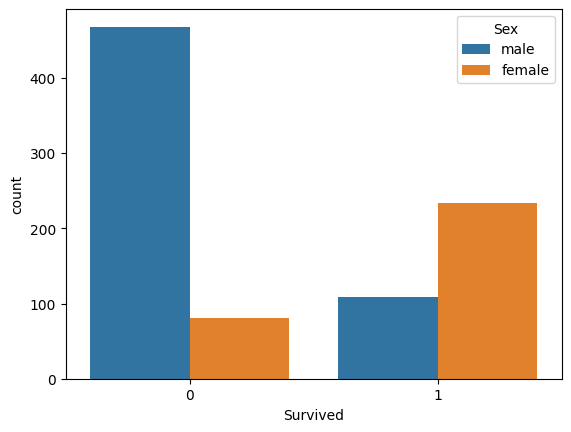

In [4]:
sns.countplot(x='Survived', hue='Sex', data=data)

<Axes: xlabel='Survived', ylabel='count'>

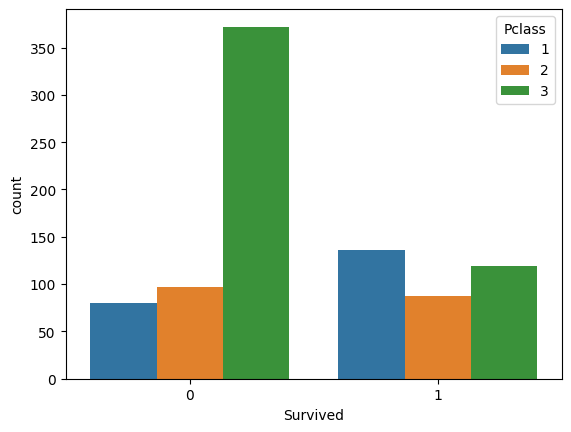

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

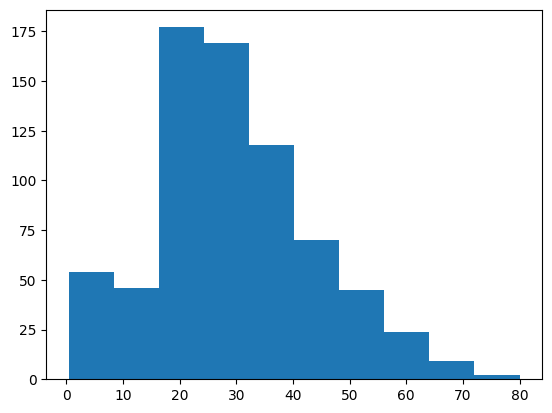

In [6]:
plt.hist(data['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

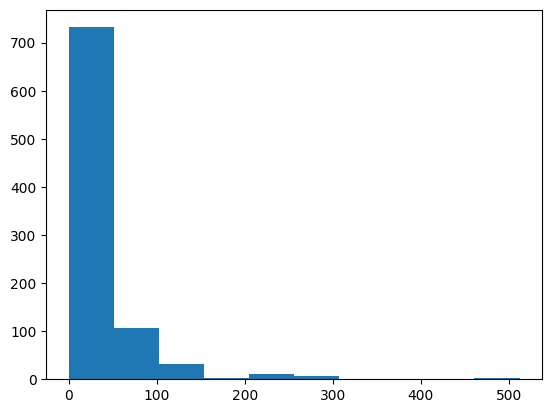

In [7]:
plt.hist(data['Fare'])

<Axes: >

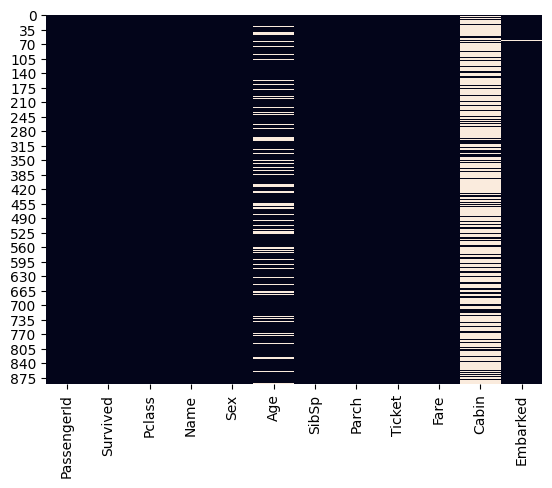

In [8]:
sns.heatmap(data.isnull(), cbar=False)

<Axes: xlabel='Pclass', ylabel='Age'>

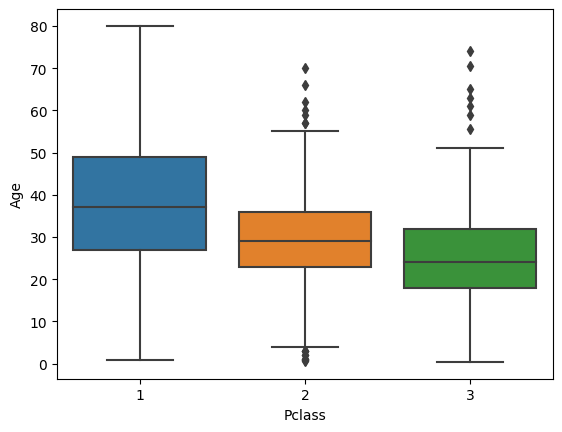

In [9]:
sns.boxplot(data['Pclass'], data['Age'])

In [10]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]

    if pd.isnull(age):
        if(passenger_class==1):
            return data[data['Pclass']==1]['Age'].mean()
        elif(passenger_class==2):
            return data[data['Pclass']==2]['Age'].mean()
        elif(passenger_class==3):
            return data[data['Pclass']==3]['Age'].mean()
    else:
        return age

In [11]:
data['Age'] = data[['Age','Pclass']].apply(impute_missing_age, axis=1)

In [12]:
data.dropna(subset=['Embarked'], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

<Axes: >

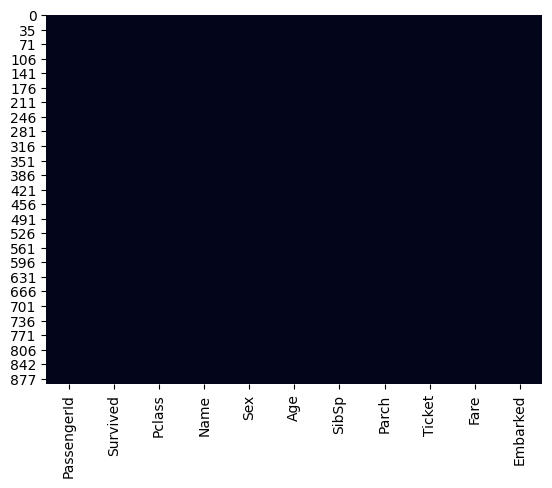

In [13]:
sns.heatmap(data.isnull(), cbar=False)

In [14]:
sex_data = pd.get_dummies(data['Sex'], drop_first = True)
embarked_data = pd.get_dummies(data['Embarked'], drop_first = True)

In [15]:
data = pd.concat([data, sex_data, embarked_data], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [16]:
data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [18]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
X = data.drop('Survived', axis=1)
Y = data['Survived']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [21]:
lr = LogisticRegression(max_iter=1000)

In [22]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
pred = lr.predict(x_test)

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       170
           1       0.79      0.74      0.77        97

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267

